Purpose: Calculate log2 fold change on mean & median TPM stressed & control for each gene, and each stressor.<br>
Author: Anna Pardo<br>
Date initiated: June 29, 2023

In [1]:
# load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# load data
tpm = pd.read_csv("../../data/rawtpm_bptreat_noPEG.tsv",sep="\t",header="infer")
tpm.head()

,Sample,BioProject,Treatment,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR11933261,PRJNA637522,Drought,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
1,SRR11933272,PRJNA637522,Drought,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
2,SRR11933250,PRJNA637522,Drought,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
3,SRR11933029,PRJNA637522,Control,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
4,SRR11933040,PRJNA637522,Drought,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [3]:
# pull out cold & associated control samples
tpmsub = tpm[tpm["Treatment"].isin(["Cold","Control"])]
testdf = tpmsub[["Sample","BioProject","Treatment"]]
for b in testdf["BioProject"].unique():
    df = testdf[testdf["BioProject"]==b]
    if len(df["Treatment"].unique())==1:
        testdf = testdf[testdf["BioProject"]!=b]
tpmsub = tpmsub.merge(testdf)
tpmsub.head()

,Sample,BioProject,Treatment,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR9841917,PRJNA556806,Control,2.869745,27.199983,0.740938,11.898216,1.577553,0.319136,0.882078,...,0.000000,8.577532,0.0,0.0,0.0,0.374718,0.0,0.465153,0.298661,1.922349
1,SRR9841918,PRJNA556806,Cold,2.521010,27.987848,0.113083,9.608838,1.255432,0.252497,0.549933,...,0.000000,7.336872,0.0,0.0,0.0,0.405890,0.0,0.000000,0.000000,0.000000
2,SRR9841942,PRJNA556806,Cold,1.736273,33.664191,0.213226,9.206056,0.270110,0.068229,0.275224,...,0.189075,6.370806,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,SRR9841959,PRJNA556806,Control,2.426083,32.860177,1.358263,12.494684,1.031226,0.000000,0.815887,...,0.684642,6.861304,0.0,0.0,0.0,1.827359,0.0,0.000000,0.000000,0.000000
4,SRR9841997,PRJNA556806,Control,2.413080,27.844652,0.929552,11.043339,0.895393,0.119772,0.810047,...,0.363881,9.109069,0.0,0.0,0.0,0.823886,0.0,0.465050,0.000000,1.862380


In [4]:
# rearrange the columns somewhat
tpmsub = tpmsub.set_index("Sample").drop("BioProject",axis=1)
tpmsub.head()

,Treatment,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR9841917,Control,2.869745,27.199983,0.740938,11.898216,1.577553,0.319136,0.882078,0.0,0.427845,...,0.000000,8.577532,0.0,0.0,0.0,0.374718,0.0,0.465153,0.298661,1.922349
SRR9841918,Cold,2.521010,27.987848,0.113083,9.608838,1.255432,0.252497,0.549933,0.0,0.249477,...,0.000000,7.336872,0.0,0.0,0.0,0.405890,0.0,0.000000,0.000000,0.000000
SRR9841942,Cold,1.736273,33.664191,0.213226,9.206056,0.270110,0.068229,0.275224,0.0,0.000000,...,0.189075,6.370806,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
SRR9841959,Control,2.426083,32.860177,1.358263,12.494684,1.031226,0.000000,0.815887,0.0,0.000000,...,0.684642,6.861304,0.0,0.0,0.0,1.827359,0.0,0.000000,0.000000,0.000000
SRR9841997,Control,2.413080,27.844652,0.929552,11.043339,0.895393,0.119772,0.810047,0.0,0.000000,...,0.363881,9.109069,0.0,0.0,0.0,0.823886,0.0,0.465050,0.000000,1.862380


In [5]:
medianexp = tpmsub.groupby(by="Treatment").median().transpose()
medianexp.head()

Treatment,Cold,Control
Zm00001eb000010,3.946270,11.235472
Zm00001eb000020,7.193755,2.507380
Zm00001eb000050,0.000000,0.012178
Zm00001eb000060,16.515444,20.029306
Zm00001eb000070,0.000000,0.058324


In [6]:
# take the means
meanexp = tpmsub.groupby(by="Treatment").mean().transpose()
meanexp.head()

Treatment,Cold,Control
Zm00001eb000010,7.903734,10.680200
Zm00001eb000020,70.170136,65.105633
Zm00001eb000050,0.268680,0.305239
Zm00001eb000060,18.077522,22.476354
Zm00001eb000070,0.293699,0.373775


In [7]:
meanexp["Cold"][0]/meanexp["Control"][0]

0.7400361693272822

In [8]:
# calculate log fold change
lfc = []
for i in range(len(meanexp.index)):
    lfc.append(np.log2(meanexp["Cold"][i]/meanexp["Control"][i]))
meanexp["log2FoldChange"]=lfc
meanexp.head()

/tmp/ipykernel_7384/4144522359.py:4: RuntimeWarning: invalid value encountered in double_scalars
  lfc.append(np.log2(meanexp["Cold"][i]/meanexp["Control"][i]))
/tmp/ipykernel_7384/4144522359.py:4: RuntimeWarning: divide by zero encountered in log2
  lfc.append(np.log2(meanexp["Cold"][i]/meanexp["Control"][i]))
/tmp/ipykernel_7384/4144522359.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  lfc.append(np.log2(meanexp["Cold"][i]/meanexp["Control"][i]))


Treatment,Cold,Control,log2FoldChange
Zm00001eb000010,7.903734,10.680200,-0.434332
Zm00001eb000020,70.170136,65.105633,0.108075
Zm00001eb000050,0.268680,0.305239,-0.184048
Zm00001eb000060,18.077522,22.476354,-0.314211
Zm00001eb000070,0.293699,0.373775,-0.347834


In [9]:
df = pd.DataFrame(list(zip([1,2,3],["hello","hello","hellogoodbye"])),columns=["A","B"])
df

,A,B
0,1,hello
1,2,hello
2,3,hellogoodbye


In [10]:
for i in range(len(df.index)):
    val = df["B"][i]
    if "goodbye" in val:
        df["B"][i] = val.split("g")[0]

/tmp/ipykernel_7384/2194368185.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["B"][i] = val.split("g")[0]


In [11]:
df

,A,B
0,1,hello
1,2,hello
2,3,hello


In [14]:
# now write a function to do this
def stressor_lfc(tpmdf,stressor,statistic,filename):
    # pull out all samples associated with stressor (both stressed and control)
    # replace DroughtRepeat with Drought
    for i in range(len(tpm.index)):
        treat = tpm["Treatment"][i]
        if "Repeat" in treat.strip():
            tpm["Treatment"][i] = treat.split("R")[0]
            print(tpm["Treatment"][i])
    tpmsub = tpmdf[tpmdf["Treatment"].isin([stressor,"Control"])]
    testdf = tpmsub[["Sample","BioProject","Treatment"]]
    for b in testdf["BioProject"].unique():
        df = testdf[testdf["BioProject"]==b]
        if len(df["Treatment"].unique())==1:
            testdf = testdf[testdf["BioProject"]!=b]
    tpmsub = tpmsub.merge(testdf)
    
    # rearrange columns
    tpmsub = tpmsub.set_index("Sample").drop("BioProject",axis=1)
    
    # calculate summary statistic
    if statistic=="mean":
        sumexp = tpmsub.groupby(by="Treatment").mean().transpose()
    elif statistic=="median":
        sumexp = tpmsub.groupby(by="Treatment").median().transpose()
        
    # reset index
    sumexp = sumexp.reset_index().rename(columns={"index":"GeneID"})
    
    # calculate fold change and log fold change
    lfc = []
    fc = []
    for i in range(len(sumexp.index)):
        fc.append(((sumexp[stressor][i]+1)/(sumexp["Control"][i]+1)))
        lfc.append(np.log2((sumexp[stressor][i]+1)/(sumexp["Control"][i]+1)))
    sumexp["log2FoldChange"]=lfc
    sumexp["FoldChange"] = fc
    
    # write file
    sumexp.to_csv(filename,sep="\t",header=True,index=False)

In [4]:
# generate lists of filenames
stressors = ["Drought","Cold","Heat","Low_Nitrogen","Salt","Flooding"]

In [5]:
meanfiles = []
medianfiles = []
for s in stressors:
    meanfiles.append("log2FoldChange_"+s+"_meanTPM.tsv")
    medianfiles.append("log2FoldChange_"+s+"_medianTPM.tsv")

In [15]:
# generate the files
for i in range(len(stressors)):
    stressor_lfc(tpm,stressors[i],"mean","../../data/"+meanfiles[i])
    stressor_lfc(tpm,stressors[i],"median","../../data/"+medianfiles[i])

Work on July 3, 2023: Calculate mean log fold change for overall stressed vs. control for each gene

In [7]:
# set Sample as index and drop BioProject column
tpms = tpm.set_index("Sample").drop("BioProject",axis=1)
tpms.head()

,Treatment,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,Drought,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,0.0,1.122904,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
SRR11933272,Drought,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,0.0,2.280915,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
SRR11933250,Drought,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,0.0,1.908468,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
SRR11933029,Control,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,0.0,1.619452,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
SRR11933040,Drought,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,0.0,2.264390,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [8]:
# make a column for stressed or control
sc = []
for i in list(tpms["Treatment"]):
    if i == "Control":
        sc.append("Control")
    else:
        sc.append("Stressed")
tpms["StressCont"] = sc
tpms.head()

,Treatment,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030,StressCont
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,Drought,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,0.0,1.122904,...,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000,Stressed
SRR11933272,Drought,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,0.0,2.280915,...,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000,Stressed
SRR11933250,Drought,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,0.0,1.908468,...,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349,Stressed
SRR11933029,Control,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,0.0,1.619452,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075,Control
SRR11933040,Drought,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,0.0,2.264390,...,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959,Stressed


In [9]:
tpmsc = tpms.drop("Treatment",axis=1)

In [10]:
# calculate mean and median expression
means = tpmsc.groupby("StressCont").mean().transpose()
medians = tpmsc.groupby("StressCont").median().transpose()

In [11]:
medians

StressCont,Control,Stressed
Zm00001eb000010,7.461740,8.746047
Zm00001eb000020,1.928400,2.655537
Zm00001eb000050,0.000000,0.000000
Zm00001eb000060,10.813070,10.713225
Zm00001eb000070,0.175412,0.451106
...,...,...
Zm00001eb442890,0.000000,0.000000
Zm00001eb442910,0.000000,0.000000
Zm00001eb442960,0.000000,0.000000
Zm00001eb442980,0.000000,0.000000


In [12]:
# reset index for both summary dataframes
means = means.reset_index().rename(columns={"index":"GeneID"})
medians = medians.reset_index().rename(columns={"index":"GeneID"})
means.head()

StressCont,GeneID,Control,Stressed
0,Zm00001eb000010,8.727933,9.924736
1,Zm00001eb000020,28.632358,21.016712
2,Zm00001eb000050,0.268449,0.380455
3,Zm00001eb000060,14.146914,13.191133
4,Zm00001eb000070,1.579068,2.501370


In [13]:
# calculate log fold change for means df
lfc = []
fc = []
for i in range(len(means.index)):
    fc.append((means["Stressed"][i]+1)/(means["Control"][i]+1))
    lfc.append(np.log2((means["Stressed"][i]+1)/(means["Control"][i]+1)))
means["log2FoldChange"]=lfc
means["FoldChange"] = fc
means.head()

StressCont,GeneID,Control,Stressed,log2FoldChange,FoldChange
0,Zm00001eb000010,8.727933,9.924736,0.167393,1.123028
1,Zm00001eb000020,28.632358,21.016712,-0.428574,0.742996
2,Zm00001eb000050,0.268449,0.380455,0.122079,1.088302
3,Zm00001eb000060,14.146914,13.191133,-0.094034,0.936899
4,Zm00001eb000070,1.579068,2.501370,0.441070,1.357611


In [16]:
# do the same for medians
lfc = []
fc = []
for i in range(len(medians.index)):
    lfc.append(np.log2((medians["Stressed"][i]+1)/(medians["Control"][i]+1)))
    fc.append((means["Stressed"][i]+1)/(means["Control"][i]+1))
medians["log2FoldChange"]=lfc
medians["FoldChange"] = fc
medians.head()

StressCont,GeneID,Control,Stressed,log2FoldChange,FoldChange
0,Zm00001eb000010,7.461740,8.746047,0.203863,1.123028
1,Zm00001eb000020,1.928400,2.655537,0.319971,0.742996
2,Zm00001eb000050,0.000000,0.000000,0.000000,1.088302
3,Zm00001eb000060,10.813070,10.713225,-0.012246,0.936899
4,Zm00001eb000070,0.175412,0.451106,0.303986,1.357611


In [17]:
# write as files
means.to_csv("../../data/log2FoldChange_allStress_meanTPM.tsv",sep="\t",header=True,index=False)
medians.to_csv("../../data/log2FoldChange_allStress_medianTPM.tsv",sep="\t",header=True,index=False)

### July 5, 2023: Histograms of fold change

In [19]:
max(means["FoldChange"])

12.258664122146442

In [20]:
min(means["FoldChange"])

0.11144721066207881

(array([1.5306e+04, 2.3156e+04, 3.7400e+02, 8.6000e+01, 4.3000e+01,
        1.6000e+01, 6.0000e+00, 9.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13.]),
 <BarContainer object of 13 artists>)

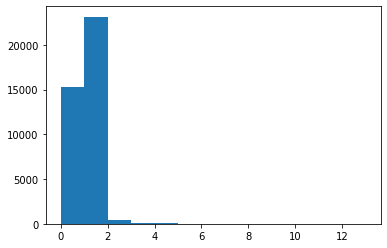

In [21]:
# histogram for fold change of mean TPM+1 for all stress vs. control
plt.hist(means["FoldChange"],bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])

(array([374.,  86.,  43.,  16.,   6.,   9.,   2.,   2.,   2.,   1.,   1.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <BarContainer object of 11 artists>)

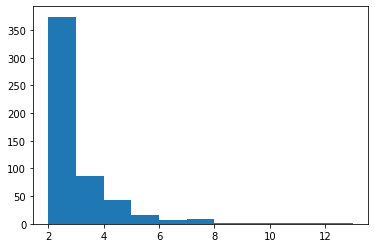

In [22]:
# make the same histogram but for genes with fold change > 2
plt.hist(means["FoldChange"],bins=[2,3,4,5,6,7,8,9,10,11,12,13])

In [2]:
# new plan: for all sets of data, plot the number of genes with fold change >2 and maybe make another plot for FC >10
## to do this, load the fold change data for individual stressors

cold = pd.read_csv("../../data/log2FoldChange_Cold_meanTPM.tsv",sep="\t",header="infer")
drought = pd.read_csv("../../data/log2FoldChange_Drought_meanTPM.tsv",sep="\t",header="infer")
heat = pd.read_csv("../../data/log2FoldChange_Heat_meanTPM.tsv",sep="\t",header="infer")
flood = pd.read_csv("../../data/log2FoldChange_Flooding_meanTPM.tsv",sep="\t",header="infer")
lown = pd.read_csv("../../data/log2FoldChange_Low_Nitrogen_meanTPM.tsv",sep="\t",header="infer")
salt = pd.read_csv("../../data/log2FoldChange_Salt_meanTPM.tsv",sep="\t",header="infer")
means = pd.read_csv("../../data/log2FoldChange_allStress_meanTPM.tsv",sep="\t",header="infer")

salt.head()

,GeneID,Control,Salt,log2FoldChange,FoldChange
0,Zm00001eb000010,12.081718,10.313852,-0.209462,0.864860
1,Zm00001eb000020,8.572977,7.475081,-0.175740,0.885313
2,Zm00001eb000050,0.362698,0.265574,-0.106674,0.928727
3,Zm00001eb000060,21.170487,18.871152,-0.157965,0.896288
4,Zm00001eb000070,2.069775,0.988555,-0.626413,0.647785


In [24]:
# generate a dataframe containing numbers of genes with FC >2 and >10 for each dataset
ds = ["Cold","Drought","Heat","Flooding","Low Nitrogen","Salt","All Stressors"]
dflist = [cold,drought,heat,flood,lown,salt,means]

In [25]:
fc2 = []
fc10 = []
for i in range(len(ds)):
    stressor = ds[i]
    df = dflist[i]
    # count number of genes with FC >=2
    df2 = df[df["FoldChange"]>=2]
    fc2.append(len(df2.index))
    # count number of genes with FC >=10
    df10 = df[df["FoldChange"]>=10]
    fc10.append(len(df10))

In [27]:
# make dataframe
plotdf = pd.DataFrame(list(zip(ds,fc2,fc10)),columns=["Dataset","FC>=2","FC>=10"])
plotdf

,Dataset,FC>=2,FC>=10
0,Cold,446,12
1,Drought,780,18
2,Heat,1197,40
3,Flooding,2815,218
4,Low Nitrogen,461,19
5,Salt,3032,158
6,All Stressors,542,4


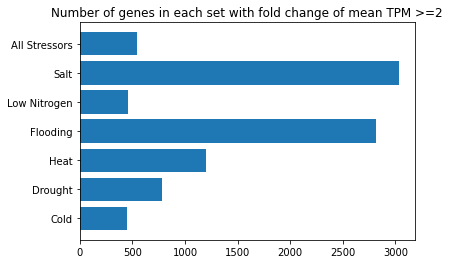

In [33]:
# make a barplot for FC>2

plt.barh(plotdf["Dataset"],plotdf["FC>=2"])
plt.title("Number of genes in each set with fold change of mean TPM >=2")
plt.savefig("../../figures/stressors_FC_over2.pdf")

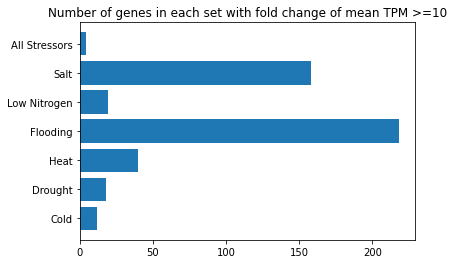

In [34]:
# make a barplot for FC>10
plt.barh(plotdf["Dataset"],plotdf["FC>=10"])
plt.title("Number of genes in each set with fold change of mean TPM >=10")
plt.savefig("../../figures/stressors_FC_over10.pdf")

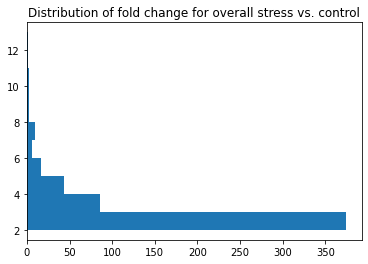

In [4]:
# make histograms of the overall fold change distribution for each dataset
plt.hist(means["FoldChange"],bins=range(2,math.ceil(max(means["FoldChange"]))+1),orientation="horizontal")
plt.title("Distribution of fold change for overall stress vs. control")
plt.savefig("../../figures/FC_histogram_over2_allstress.pdf")

In [81]:
plt.cla()
plt.clf()

<Figure size 432x288 with 0 Axes>

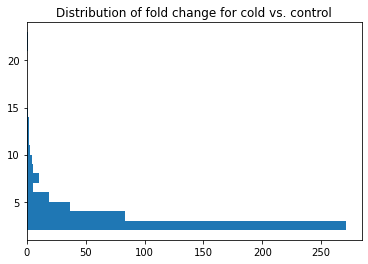

In [5]:
# cold
plt.hist(cold["FoldChange"],bins=range(2,math.ceil(max(cold["FoldChange"]))+1),orientation="horizontal")
plt.title("Distribution of fold change for cold vs. control")
plt.savefig("../../figures/FC_histogram_over2_cold.pdf")

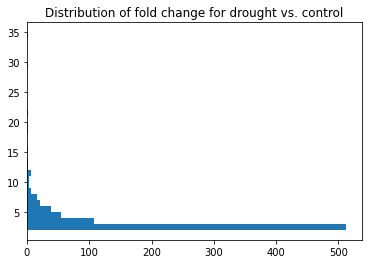

In [7]:
plt.hist(drought["FoldChange"],bins=range(2,math.ceil(max(drought["FoldChange"]))+1),orientation="horizontal")
plt.title("Distribution of fold change for drought vs. control")
plt.savefig("../../figures/FC_histogram_over2_drought.pdf")

In [84]:
max(flood["FoldChange"])

552.3795400666562

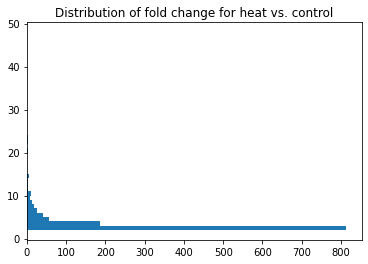

In [8]:
plt.hist(heat["FoldChange"],bins=range(2,math.ceil(max(heat["FoldChange"]))+1),orientation="horizontal")
plt.title("Distribution of fold change for heat vs. control")
plt.savefig("../../figures/FC_histogram_over2_heat.pdf")

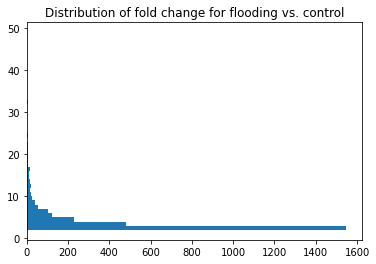

In [14]:
#plt.hist(flood["FoldChange"],bins=range(2,math.ceil(max(flood["FoldChange"]))+1),orientation="horizontal")
plt.hist(flood["FoldChange"],bins=range(2,50),orientation="horizontal")
plt.title("Distribution of fold change for flooding vs. control")
plt.savefig("../../figures/FC_histogram_2-50_flooding.pdf")

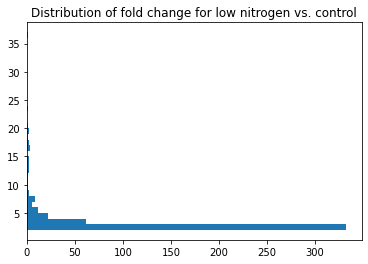

In [15]:
plt.hist(lown["FoldChange"],bins=range(2,math.ceil(max(lown["FoldChange"]))+1),orientation="horizontal")
plt.title("Distribution of fold change for low nitrogen vs. control")
plt.savefig("../../figures/FC_histogram_over2_low_nitrogen.pdf")

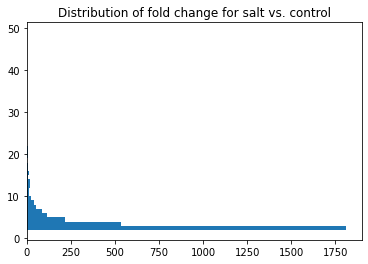

In [18]:
#plt.hist(salt["FoldChange"],bins=range(2,math.ceil(max(salt["FoldChange"]))+1),orientation="horizontal")
plt.hist(salt["FoldChange"],bins=range(2,50),orientation="horizontal")
plt.title("Distribution of fold change for salt vs. control")
plt.savefig("../../figures/FC_histogram_2-50_salt.pdf")